#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#### Business Goal 

Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Step 1 : Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
leads = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### Step 2:  Inspect Data

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Missing Values

missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# Check duplicates

leads[leads.duplicated (keep=False)]

# No Plulicate values found

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

####  We need to do Missing value treatment, Categorical data encoding and Convert 'Select' to NaN as this is as good as Nan where the user did not select any option

In [8]:
# Changing Select to Nan
leads = leads.replace('Select', np.nan)

In [9]:
missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Step 3: Encoding the variables with Yes/No labels with 1/0

In [10]:
for feature in ['Do Not Email', 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                'I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    
    leads[feature]=leads[feature].apply(lambda x: 1 if x=='Yes' else 0)
    

In [11]:
leads.head(3)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   

     Lead Profile    City Asymmetrique Activity Index  \
0             NaN     NaN                   02.Medium   
1             NaN     NaN                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   

   Asymmetrique Profile Score  I agree to pay the amount through cheque  \
0                        15.0                                         0   
1                        15.0                                         0   
2                        20.0                                         0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened

In [12]:
# Checking the remaining categorical variable

leads.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 5860 non-null   object
 6   How did you hear about X Education             1990 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [13]:
# checking lables of the categorical columns

for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("******************************************")
    print(leads[col].value_counts(normalize= True))
    print("******************************************")

Lead Origin
******************************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
******************************************
Lead Source
******************************************
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Nam

#### Step 4: Handling Missing values

- Dropping columns having more than 60% missing values 

In [14]:
leads = leads.drop(leads.loc[:,list(round(leads.isnull().sum()/leads.shape[0],2)>0.6)].columns, 1)

In [15]:
missing_percent = round(leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

- Dropping Asymmetrique Activity Index  , Asymmetrique Profile Index,  Asymmetrique Activity Score , Asymmetrique Profile Score as values seems not imputable and may not give any relevant information 

In [16]:
leads = leads.drop(['Asymmetrique Activity Index' , 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score'],1)

- Lead quality is determined by the assumption of the person who is checking it. So Nan can be imputed with Not sure

In [17]:
leads['Lead Quality']= leads['Lead Quality'].replace(np.nan, 'Not Sure')

- Missing City can be imputed with Mumbai (Mode)

In [18]:
leads['City']=leads['City'].replace(np.nan, 'Mumbai')

- Impute specialization with Others as there is no much difference between the Top 3 specializations

In [19]:
leads['Specialization']=leads['Specialization'].replace(np.nan,'Others')

- Impute Tags with Will revert after reading the email (Mode), What is your current occupation with Unemployed (mode) and , What matters most to you in choosing a course with Better Career Prospects  (mode) , Country with India (mode)

In [20]:
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
leads['Country'] = leads['Country'].replace(np.nan,'India')

- Dropping the rows for rest of the missing values whichis is less 1.5%

In [21]:
leads.dropna(inplace=True)

In [22]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                   Others                      Unemployed   
1   India                   Others                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   Others                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                   

In [23]:
missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Step 5: Exploratory Data Analysis 

In [24]:
# Checking the Target variable for data imbalance

leads['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

- The data shows good representation of both Converted and Non-converted and hence we are good to go.

#### Plotting different features Vs Converted to understand the Conversion rate and impact 

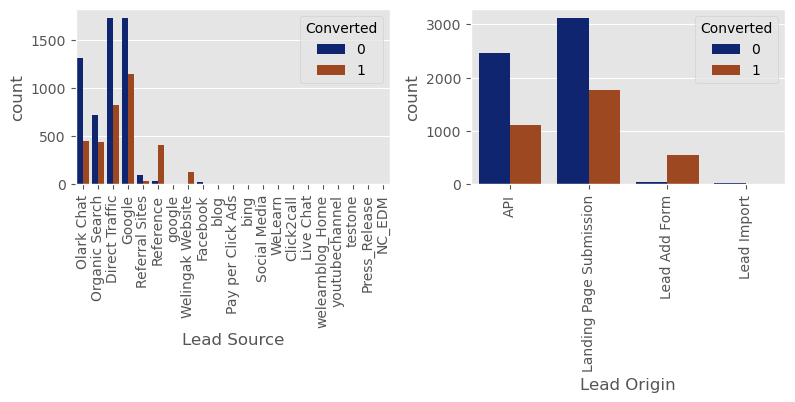

In [25]:
fig = plt.subplots(figsize = (12,10))
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3,3,i+1)
    sns.countplot(x=leads[feature],hue= leads['Converted'],palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Lead Source:-
- Google Search and Direct Traffic has highest lead counts followed by Olark Chat and Organic Search
- The Conversion rate is higher for Reference and Welingak Website 
- Lead Origin:-
- API and Landing page Submission has the maximum count of leads with low conversion rate
- Lead Add Forms have low count of leads but high conversion rate
- Lead Import and low count as well as conversion

#### To improve overall conversion rate we need to increase conversion rate of Google Search , Direct Traffic, API and Landing page Submission.
#### Also we need to increase the lead count for Reference, Welingak Website and Lead Add Forms

In [26]:
# Lead Source has many sources with neglible count of leads. We can club them togther in one sourse Other_Sources

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Other_Sources')
leads['Lead Source'] = leads['Lead Source'].replace(['google'],'Google')

In [27]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other_Sources         23
Name: Lead Source, dtype: int64

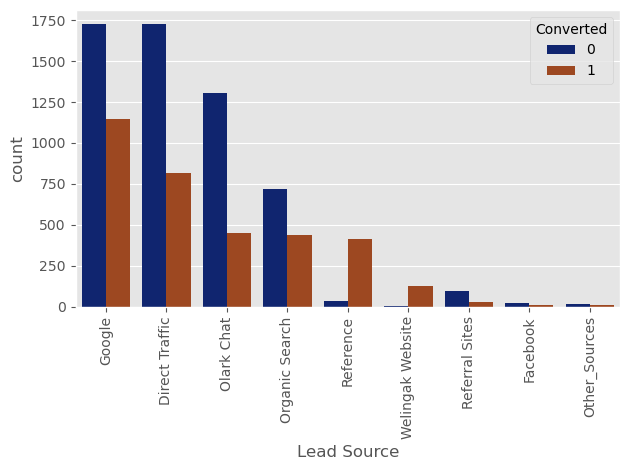

In [28]:
# Plotting Lead Source 
sns.countplot(x='Lead Source',hue= 'Converted',data = leads , palette='dark',order=leads['Lead Source'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

In [29]:
# Analyzing Total Visits , Total Time Spent on Website

print(leads['TotalVisits'].value_counts())
print(leads['Total Time Spent on Website'].value_counts())

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64


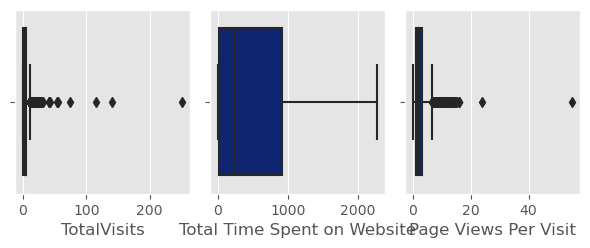

In [30]:
fig = plt.subplots(figsize = (6,7))
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=leads[feature],palette='dark')
    plt.tight_layout()

In [31]:
# There are many outliers in Total visits columns and we can cap this variable to 95 percentile , Also check 95th percentile of Page Views Per Visit
percentile = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits'] >=percentile] = percentile

percentile2 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >=percentile2] = percentile2

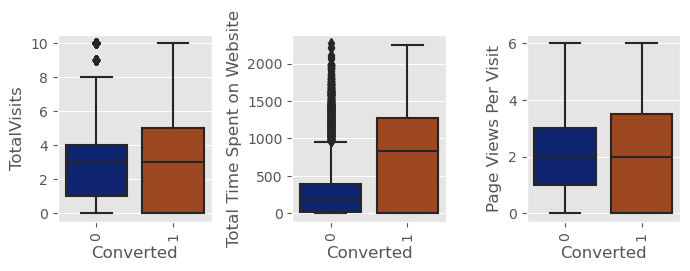

In [32]:
fig = plt.subplots(figsize = (7,7))
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,i+1)
    sns.boxplot(y= feature ,x= 'Converted',data = leads , palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Median of TotalVisits and Page Views Per Visit are almost same. So no conclusion can be made
- Users with more Time Spent on website are likely to be converted 

##### Website can be made more informative and appealing to increase the time user spends on website

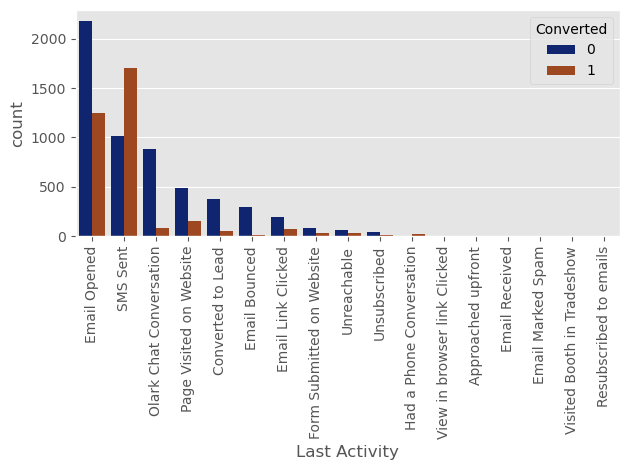

In [33]:
# Analyzing Last Activity
sns.countplot(x='Last Activity',hue= 'Converted',data = leads , palette='dark',order=leads['Last Activity'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

In [34]:
# Converting Last Activity with negligible count (25 or less) to Others
# Email Opened                    3432
# SMS Sent                        2716
# Olark Chat Conversation          972
# Page Visited on Website          640
# Converted to Lead                428
# Email Bounced                    312
# Email Link Clicked               267
# Form Submitted on Website        116
# Unreachable                       90
# Unsubscribed                      59
# Had a Phone Conversation          25
# View in browser link Clicked       6
# Approached upfront                 5
# Email Received                     2
# Email Marked Spam                  2
# Visited Booth in Tradeshow         1
# Resubscribed to emails             1

leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked', 'Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [35]:
leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Others                         42
Name: Last Activity, dtype: int64

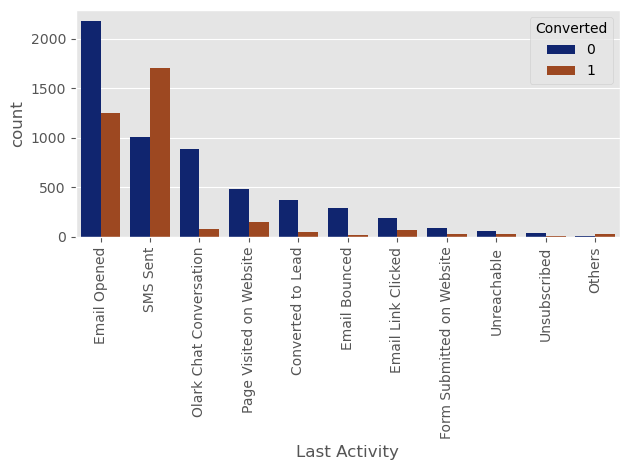

In [36]:
# Analyzing Last Activity
sns.countplot(x='Last Activity',hue= 'Converted',data = leads , palette='dark',order=leads['Last Activity'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

- Count of leads in maximum for the Last Activity Email Opened
- Coversion is maximum for the Last Activity SMS Sent 

##### We should target to call more people with Last Activity as Email Opened and increase their convesrion rate and also increase the count of  users with last activity as SMS Sent 

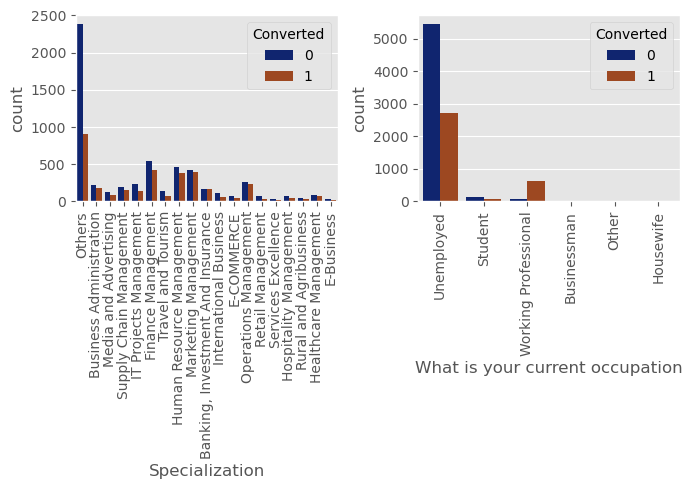

In [37]:
fig = plt.subplots(figsize = (7,7))
for i, feature in enumerate(['Specialization', 'What is your current occupation']):
    plt.subplot(2,2,i+1)
    sns.countplot(x= feature ,hue= 'Converted',data = leads , palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Specialization is not giving any particular inference from the plot 
- Working Professionals have highest conversion
- Unemployed users create more leads


##### To increase overall conversion rate, we need to increase the number of leads for Working Professionals by reaching out to them more and also increasing conversion rate of leads of Unemployed users. 

- More than 95% of the Country is India and more than 57% of City is Mumbai. So these wont give much ineference.

In [38]:
    leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [39]:
# Renaming Other to Other_Occupation
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other'],'Other_Occupation')


In [40]:
    leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other_Occupation        0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

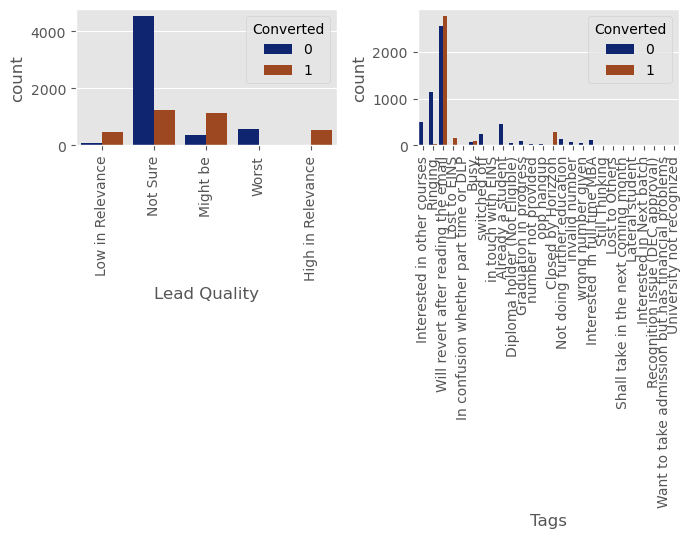

In [41]:
# Analyzing Lead Quality and Tags 
fig = plt.subplots(figsize = (7,7))
for i, feature in enumerate(['Lead Quality', 'Tags']):
    plt.subplot(2,2,i+1)
    sns.countplot(x= feature ,hue= 'Converted',data = leads , palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [42]:
# Converting all low count categories (less than 100) in Tags to Other_Tags
# invalid number                                         83
# Diploma holder (Not Eligible)                          63
# wrong number given                                     47
# opp hangup                                             33
# number not provided                                    25
# in touch with EINS                                     12
# Lost to Others                                          7
# Still Thinking                                          6
# Want to take admission but has financial problems       6
# In confusion whether part time or DLP                   5
# Interested in Next batch                                5
# Lateral student                                         3
# Shall take in the next coming month                     2
# University not recognized                               2
# Recognition issue (DEC approval)                        1
leads['Tags']=leads['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Other_Tags')


In [43]:
leads['Tags'].value_counts()

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
Other_Tags                              300
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Name: Tags, dtype: int64

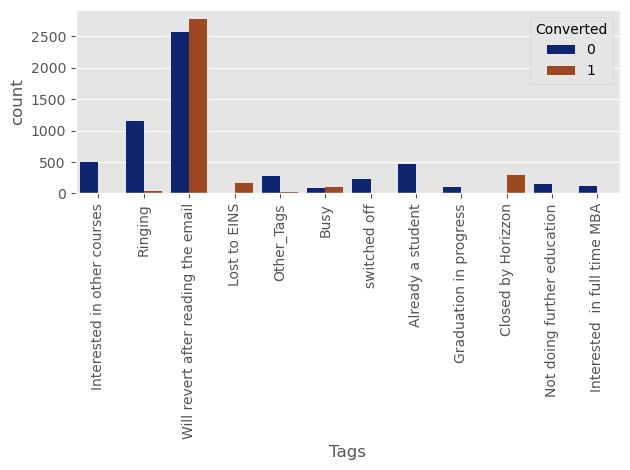

In [44]:
# Plot Tags again
sns.countplot(x= 'Tags' ,hue= 'Converted',data = leads , palette='dark')
plt.xticks(rotation=90)
plt.tight_layout()

- 'Will revert after reading email' and 'Closed by Horizzon' has the highest conversion rate.

In [45]:
# Analyzing other columns 

leads[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

In [46]:
# Most of these have 0 or No in all columns and wont contribute much to the analysis. Hence unnecessary columns can be dropped. 
leads= leads.drop(['Lead Number','Search','Magazine','Newspaper Article','Country','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Update me on Supply Chain Content','Get updates on DM Content'
         ,'I agree to pay the amount through cheque','A free copy of Mastering The Interview','What matters most to you in choosing a course','Receive More Updates About Our Courses','Do Not Call'],1)

In [47]:
leads.head(2)

Prospect ID Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620         API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482         API  Organic Search   

   Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   

   Page Views Per Visit            Last Activity Specialization  \
0                   0.0  Page Visited on Website         Others   
1                   2.5             Email Opened         Others   

  What is your current occupation                         Tags  \
0                      Unemployed  Interested in other courses   
1                      Unemployed                      Ringing   

       Lead Quality    City Last Notable Activity  
0  Low in Relevance  Mumbai              Modified  
1          Not Sure  Mumbai          Email Opened

#### Step 6: Creating Dummy Variables

In [48]:
dummy = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags', 'Lead Quality','City','Last Notable Activity']])
dummy.head()

Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Sources  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0         

In [49]:
# Dropping original columsn for which dummy is created
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags', 'Lead Quality','City','Last Notable Activity'],1)
leads.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  
0                            0                   0.0  
1                          674                   2.5  
2                         1532                   2.0  
3                          305                   1.0  
4                         1428                   1.0

In [50]:
leads = pd.concat([leads,dummy],axis=1)
leads.head(3)

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Lead Origin_API  \
0                            0                   0.0                1   
1                          674                   2.5                1   
2                         1532                   2.0                0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   

   Lead Source_Other_Sources  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   

   Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   

   Specialization

#### Step 7: Test_Train Split

In [51]:
# Assign Feature Variables to X and Target Variable to y 
X = leads.drop(['Prospect ID','Converted'],axis=1)
y = leads['Converted']

In [52]:
# Split Data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

#### Step 8: Feature Scaling

In [53]:
# Scaling features which are not 1 and 0 
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_API  \
3009             -0.155018                0   
1012             -0.155018                0   
9226             -1.265540                1   
4750             -0.155018                0   
7987              0.122613                0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other_Sources  \
3009                           0                          0   
1012                           0                          0   
9226                           0                          0   
4750                           0                          0   
7987                           0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
3009                             0                                0   
1012                             0                                0   
9226                             0                                0   
4750                             0                                0   
7987                             0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3009                           1                                        0   
1012                           0                                        0   
9226                           0                                        0   
4750                           0                                        0   
7987                           0                                        0   

      Last Activity_Olark Chat Conversatio

#### Step 9: Analyzing Correlation

In [54]:
corr = leads.corr()
corr.head()

Do Not Email  Converted  TotalVisits  \
Do Not Email                     1.000000  -0.140786     0.001856   
Converted                       -0.140786   1.000000     0.050742   
TotalVisits                      0.001856   0.050742     1.000000   
Total Time Spent on Website     -0.046192   0.359261     0.361207   
Page Views Per Visit             0.022891   0.000329     0.766567   

                             Total Time Spent on Website  \
Do Not Email                                   -0.046192   
Converted                                       0.359261   
TotalVisits                                     0.361207   
Total Time Spent on Website                     1.000000   
Page Views Per Visit                            0.364735   

                             Page Views Per Visit  Lead Origin_API  \
Do Not Email                             0.022891        -0.083921   
Converted                                0.000329        -0.111336   
TotalVisits                              0.766567        -0.317723   
Total Time Spent on Website              0.364735        -0.198055   
Page Views Per Visit                     1.000000        -0.402751   

                             Lead Origin_Landing Page Submission  \
Do Not Email                                            0.099661   
Converted                                              -0.037481   
TotalVisits                                             0.454350   
Total Time Spent on Website                             0.292571   
Page Views Per Visit                                    0.554142   

                             Lead Origin_Lead Add Form  \
Do Not Email                                 -0.031468   
Converted                                     0.300775   
TotalVisits                                  -0.276775   
Total Time Spent on Website                  -0.188526   
Page Views Per Visit                         -0.308881   

                             Lead Origin_Lead Import  \
Do Not Email                               -0.016857   
Converted                                  -0.009328   
TotalVisits                                -0.060592   
Total Time Spent on Website                -0.050742   
Page Views Per Visit                       -0.066440   

                             Lead Source_Direct Traffic  Lead Source_Facebook  \
Do Not Email                                   0.112262             -0.017137   
Converted                                     -0.073186             -0.010651   
TotalVisits                                    0.127618             -0.059061   
Total Time Spent on Website                    0.140793             -0.050248   
Page Views Per Visit                           0.160330             -0.063534   

                             Lead Source_Google  Lead Source_Olark Chat  \
Do Not Email                          -0.070919               -0.051070   
Converted                              0.029022               -0.124085   
TotalVisits                            0.217347               -0.504613   
Total Time Spent on Website            0.215448               -0.378626   
Page Views Per Visit                   0.262680               -0.579202   

                             Lead Source_Organic Search  \
Do Not Email                                   0.035510   
Converted                                     -0.000581   
TotalVisits                                    0.302834   
Total Time Spent on Website                    0.100986   
Page Views Per Visit                           0.311582   

                             Lead Source_Other_Sources  Lead Source_Reference  \
Do Not Email                                  0.009635              -0.035958   
Converted                                     0.001325               0.255480   
TotalVisits                                  -0.000326              -0.240579   
Total Time Spent on Website                  -0.002751              -0.162919   
Page Views Per Visit                   

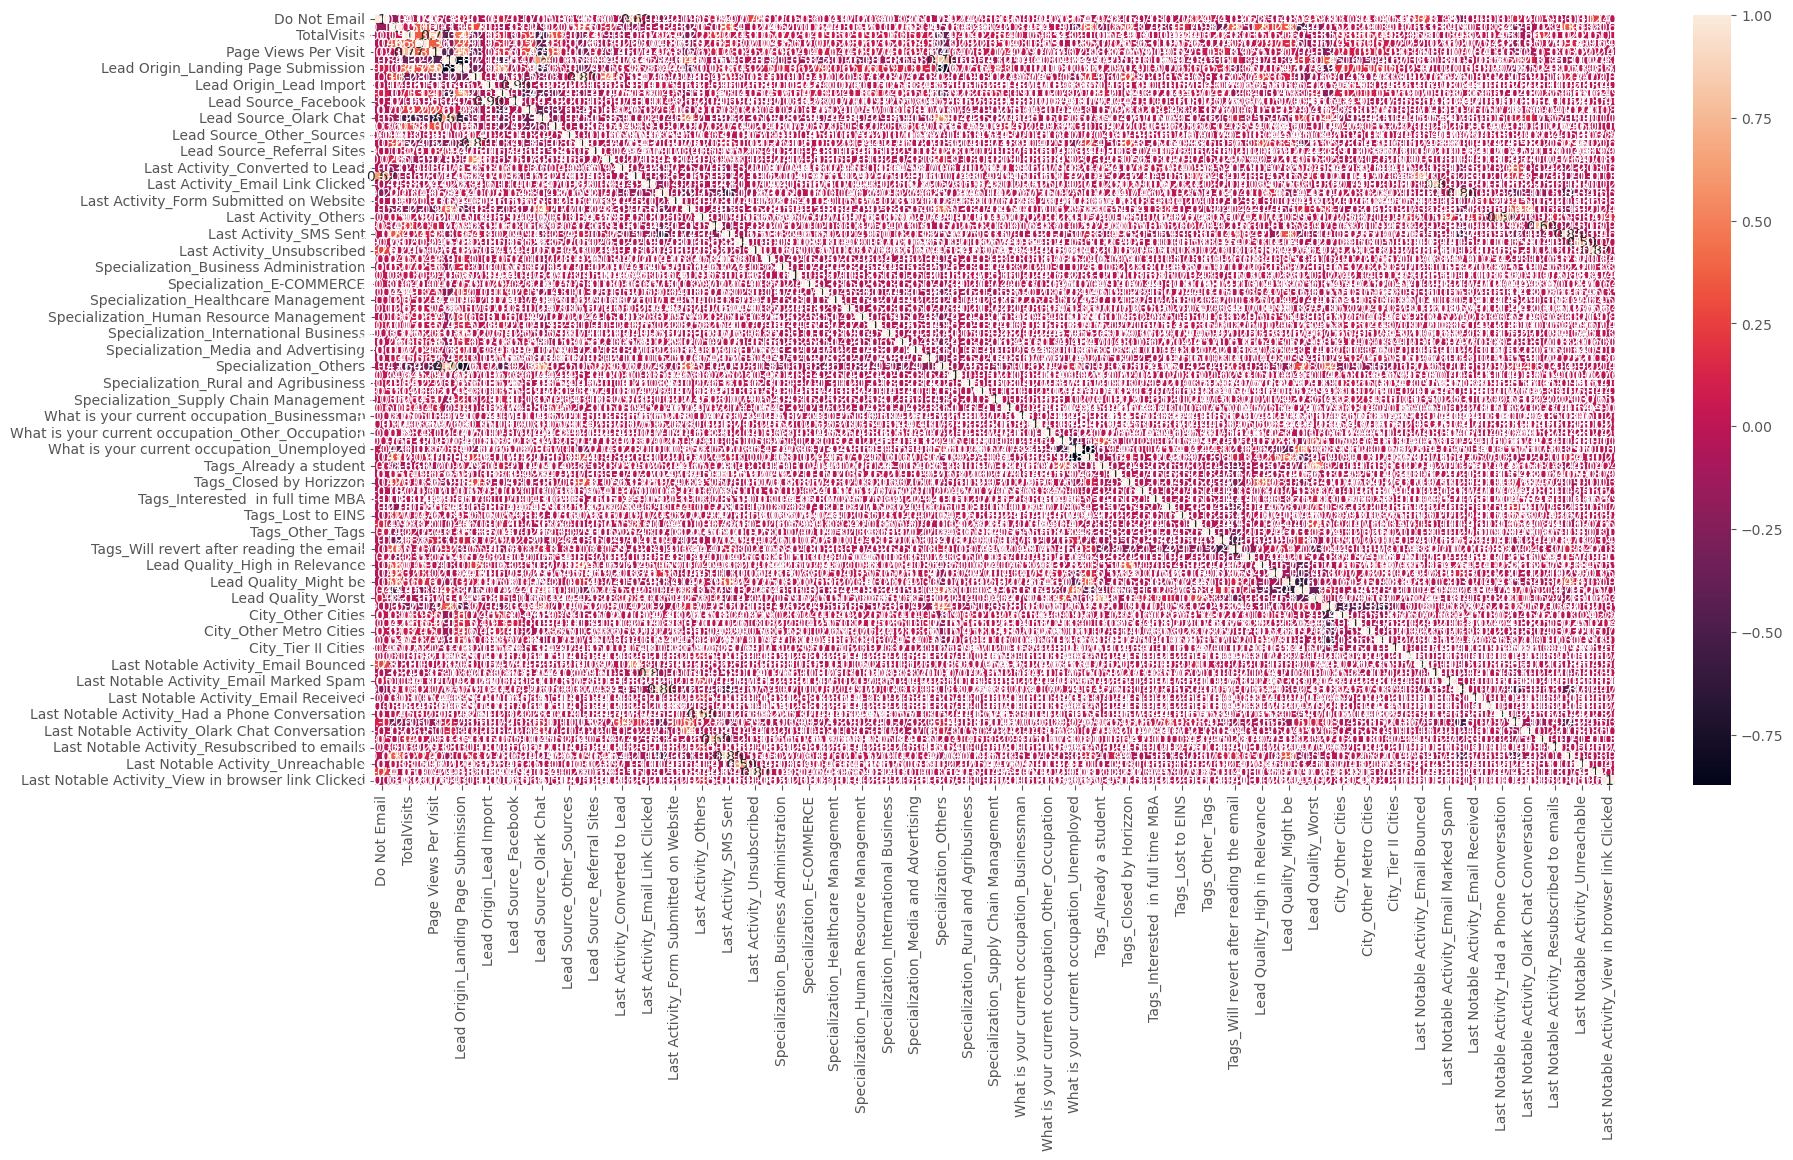

In [55]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True);

In [56]:
# Top Correlations
top_corr = corr.unstack().sort_values(kind='quicksort',ascending=False)
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.766567
Lead Origin_API                        Specialization_Others                            0.759770
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
dtype: float64

In [57]:
# Drop highly correlated Features
X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Unreachable','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Unreachable','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],1)
corr_train = X_train.corr()


In [58]:
corr_train.where(np.triu(np.ones(corr_train.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form            Lead Source_Reference                             0.859537
TotalVisits                          Page Views Per Visit                              0.766735
Lead Origin_API                      Specialization_Others                             0.753974
Do Not Email                         Last Activity_Email Bounced                       0.624939
Lead Origin_API                      Lead Source_Olark Chat                            0.595018
Last Activity_Others                 Last Notable Activity_Had a Phone Conversation    0.593057
Page Views Per Visit                 Lead Origin_Landing Page Submission               0.550102
Lead Origin_Landing Page Submission  Lead Source_Direct Traffic                        0.516152
Tags_Already a student               Lead Quality_Worst                                0.514081
Lead Source_Olark Chat               Specialization_Others                             0.505771
dtype: float64

#### Step 10: Building Model

In [59]:
# Logistic Regression Model 1

lr1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Jul 2023   Deviance:                       78564.
Time:                        15:58:08   Pearson chi2:                 3.84e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.596e+26    1.3e+19  -1.23e+07      0.000    -1.6e+26    -1.6e+26
Do Not Email                                         -4.704e+14   4.44e+06  -1.06e+08      0.000    -4.7e+14    -4.7e+14
TotalVisits                                           3.251e+13   1.42e+06   2.28e+07      0.000    3.25e+13    3.25e+13
Total Time Spent on Website                           3.697e+14   1.02e+06   3.62e+08      0.000     3.7e+14     3.7e+14
Page Views Per Visit                                  -7.54e+13   1.57e+06  -4.81e+07      0.000   -7.54e+13   -7.54e+13
Lead Origin_API                                      -4.048e+25    3.3e+18  -1.23e+07      0.000   -4.05e+25   -4.05e+25
Lead Origin_Landing Page Submission                  -4.048e+25    3.3e+18  -1.23e+07      0.000   -4.05e+25   -4.05e+25
Lead Origin_Lead Add Form                            -4.048e+25    3.3e+18  -1.23e+07      0.000   -4.05e+25   -4.05e+25
Lead Origin_Lead Import                              -4.048e+25    3.3e+18  -1.23e+07      0.000   -4.05e+25   -4.05e+25
Lead Source_Direct Traffic                            3.746e+15   6.79e+07   5.52e+07      0.000    3.75e+15    3.75e+15
Lead Source_Google                                    3.872e+15   6.79e+07    5.7e+07      0.000    3.87e+15    3.87e+15
Lead Source_Olark Chat                                4.082e+15    6.8e+07      6e+07      0.000    4.08e+15    4.08e+15
Lead Source_Organic Search                            3.901e+15   6.79e+07   5.74e+07      0.000     3.9e+15     3.9e+15
Lead Source_Other_Sources                             4.005e+15   7.04e+07   5.69e+07      0.000       4e+15       4e+15
Lead Source_Reference                                 3.621e+15   7.38e+07   4.91e+07      0.000    3.62e+15    3.62e+15
Lead Source_Referral Sites                            3.571e+15   6.83e+07   5.23e+07      0.000    3.57e+15    3.57e+15
Lead Source_Welingak Website                          3.582e+15    7.4e+07   4.84e+07      0.000    3.58e+15    3.58e+15
Last Activity_Converted to Lead                      -2.259e+25   1.84e+18  -1.23e+07      0.000   -2.26e+25   -2.26e+25
Last Activity_Email Bounced                          -2.259e+25   1.84e+18  -1.23e+07      0.000   -2.26e+25   -2.26e+25
Last Activity_Email Link Clicked                     -2.259e+25   1.84e+18  -1.23e+07      0.000   -2.26e+25   -2.26e+25
Last Activity_Email Opened                           -2.259e+25   1.84e+18  -1.23e+07      0.000   -2.26e+25   -2.26e+25
Last Activity_Form Submitted on Website              -2.259e+25   1.84e+18  -1.23e+07      0.000   -2.26e+25   -2.26e+25
Last Activity_Olark Chat Conversation                -2.25

#### Step 11: Feature Selection Using RFE 

In [60]:
# Selecting 15 Features

logreg= LogisticRegression()
rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_API', False, 44),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Other_Sources', False, 64),
 ('Lead Source_Reference', False, 39),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 40),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 30),
 ('Last Activity_Form Submitted on Website', False, 69),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Others', False, 11),
 ('Last Activity_Page

In [63]:
col = X_train.columns[rfe.support_]

In [64]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Man

#### Step 12: Assessing the model with StatsModels

In [65]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.9
Date:                Mon, 17 Jul 2023   Deviance:                       3097.7
Time:                        15:58:14   Pearson chi2:                 3.61e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5706
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2766      0.226     -5.649      0.000      -1.720      -0.834
Do Not Email                                            -1.2098      0.220     -5.495      0.000      -1.641      -0.778
Lead Source_Welingak Website                             4.1417      0.735      5.636      0.000       2.702       5.582
Last Activity_SMS Sent                                   1.9420      0.102     19.002      0.000       1.742       2.142
What is your current occupation_Working Professional     1.4046      0.296      4.750      0.000       0.825       1.984
Tags_Already a student                                  -0.7978      0.791     -1.009      0.313      -2.348       0.752
Tags_Busy                                                3.5425      0.326     10.881      0.000       2.904       4.181
Tags_Closed by Horizzon                                  8.5675      0.773     11.086      0.000       7.053      10.082
Tags_Lost to EINS                                        9.4598      0.769     12.297      0.000       7.952      10.967
Tags_Ringing                                            -1.7792      0.334     -5.324      0.000      -2.434      -1.124
Tags_Will revert after reading the email                 3.7172      0.237     15.687      0.000       3.253       4.182
Tags_switched off                                       -2.3304      0.585     -3.986      0.000      -3.476      -1.184
Lead Quality_Not Sure                                   -3.3450      0.131    -25.449      0.000      -3.603      -3.087
Lead Quality_Worst                                      -3.6920      0.853     -4.329      0.000      -5.363      -2.021
Last Notable Activity_Modified                          -1.7014      0.107    -15.831      0.000      -1.912      -1.491
Last Notable Activity_Olark Chat Conversation           -1.2772      0.350     -3.651      0.000      -1.963      -0.592
========================================================================================================================
"""

- Tags_Already a student has high P Value

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.288146
1012    0.329698
9226    0.002108
4750    0.738392
7987    0.993811
1281    0.987661
2880    0.288146
4971    0.703270
7536    0.919868
1248    0.002108
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28814565, 0.3296981 , 0.00210753, 0.7383925 , 0.99381133,
       0.98766125, 0.28814565, 0.70326956, 0.91986819, 0.00210753])

#### Step 13: Creating Dataframe with True Conversion and predicted probabilities

In [68]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values,'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID']= y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID
0        0      0.288146     3009
1        0      0.329698     1012
2        0      0.002108     9226
3        1      0.738392     4750
4        1      0.993811     7987

In [69]:
#### Creating new column 'Predicted' with 1 if Convert_prob > 0.5 else 0 

y_train_pred_final['Predicted']= y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  Predicted
0        0      0.288146     3009          0
1        0      0.329698     1012          0
2        0      0.002108     9226          0
3        1      0.738392     4750          1
4        1      0.993811     7987          1

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3757  148]
 [ 359 2087]]


In [71]:
# Let's check the overall accuracy.
print("Accuracy Score:", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy Score: 0.9201700519603212


#### Step 14: Checking VIF

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                              Lead Quality_Not Sure  3.16
9            Tags_Will revert after reading the email  2.88
13                     Last Notable Activity_Modified  1.69
2                              Last Activity_SMS Sent  1.61
12                                 Lead Quality_Worst  1.55
8                                        Tags_Ringing  1.53
4                              Tags_Already a student  1.47
3   What is your current occupation_Working Profes...  1.24
0                                        Do Not Email  1.12
5                                           Tags_Busy  1.11
10                                  Tags_switched off  1.10
6                             Tags_Closed by Horizzon  1.09
7                                   Tags_Lost to EINS  1.06
14      Last Notable Activity_Olark Chat Conversation  1.06
1                        Lead Source_Welingak Website  1.05

- All features have good VIF Value. But as we observed earlier that Tags_Already a student has high P Value , will drop that column

In [73]:
col = col.drop('Tags_Already a student')
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [74]:
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [75]:
# Rerunning model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
lr3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = lr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1549.5
Date:                Mon, 17 Jul 2023   Deviance:                       3098.9
Time:                        15:58:14   Pearson chi2:                 3.64e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3454      0.219     -6.156      0.000      -1.774      -0.917
Do Not Email                                            -1.2059      0.220     -5.473      0.000      -1.638      -0.774
Lead Source_Welingak Website                             4.1414      0.735      5.636      0.000       2.701       5.582
Last Activity_SMS Sent                                   1.9466      0.102     19.052      0.000       1.746       2.147
What is your current occupation_Working Professional     1.3983      0.295      4.738      0.000       0.820       1.977
Tags_Busy                                                3.6109      0.321     11.261      0.000       2.982       4.239
Tags_Closed by Horizzon                                  8.6409      0.770     11.217      0.000       7.131      10.151
Tags_Lost to EINS                                        9.5553      0.767     12.462      0.000       8.052      11.058
Tags_Ringing                                            -1.7137      0.330     -5.197      0.000      -2.360      -1.067
Tags_Will revert after reading the email                 3.7871      0.230     16.481      0.000       3.337       4.237
Tags_switched off                                       -2.2659      0.582     -3.892      0.000      -3.407      -1.125
Lead Quality_Not Sure                                   -3.3480      0.131    -25.482      0.000      -3.605      -3.090
Lead Quality_Worst                                      -3.8770      0.820     -4.727      0.000      -5.485      -2.269
Last Notable Activity_Modified                          -1.7013      0.107    -15.826      0.000      -1.912      -1.491
Last Notable Activity_Olark Chat Conversation           -1.2809      0.350     -3.663      0.000      -1.966      -0.596
========================================================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final['Convert_Prob']= y_train_pred

#### Creating new column 'Predicted' with 1 if Convert_prob > 0.5 else 0 

y_train_pred_final['Predicted']= y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()


Convert  Convert_Prob  Pros_ID  Predicted
0        0      0.287761     3009          0
1        0      0.328745     1012          0
2        0      0.002104     9226          0
3        1      0.738907     4750          1
4        1      0.993984     7987          1

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3756  149]
 [ 359 2087]]


In [78]:
# Let's check the overall accuracy.
print("Accuracy Score:" , metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))


Accuracy Score: 0.9200125964415052


- There is no much different in the accuracy score

#### Checking VIF again 

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                              Lead Quality_Not Sure  3.07
8            Tags_Will revert after reading the email  2.83
12                     Last Notable Activity_Modified  1.69
2                              Last Activity_SMS Sent  1.61
7                                        Tags_Ringing  1.52
3   What is your current occupation_Working Profes...  1.23
0                                        Do Not Email  1.12
11                                 Lead Quality_Worst  1.12
4                                           Tags_Busy  1.11
9                                   Tags_switched off  1.10
5                             Tags_Closed by Horizzon  1.09
6                                   Tags_Lost to EINS  1.06
1                        Lead Source_Welingak Website  1.05
13      Last Notable Activity_Olark Chat Conversation  1.05

- All features have good VIF and P-Value. So we dont need to drop any more variables. We can make predictions on this model

#### Step 15:  Metrics beyond simply accuracy

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Calculate the specificity
print("Specificity :",TN / float(TN+FP))
# Calculate False positive rate  
print("False positive rate :",FP/ float(TN+FP))
# Positive predictive value 
print ("Positive predictive value :", TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value :", TN / float(TN+ FN))
#Precision Score
print("Precision Score : ", precision_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))
#Recall Score
print("Recall Score : ", recall_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Sensitivity : 0.8532297628781684
Specificity : 0.9618437900128041
False positive rate : 0.038156209987195905
Positive predictive value : 0.9333631484794276
Negative predictive value : 0.9127582017010936
Precision Score :  0.9333631484794276
Recall Score :  0.8532297628781684


#### Step 16: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

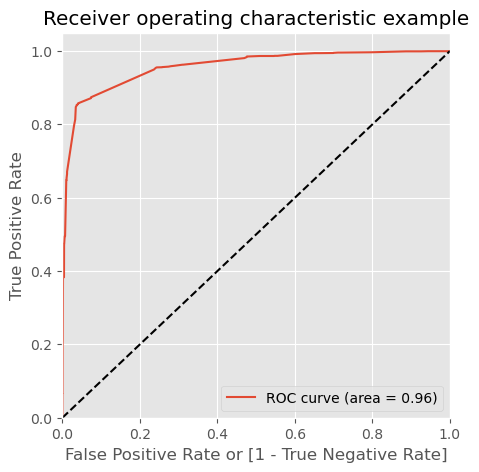

In [84]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### Step 17: Finding Optimal Cutoff Point

In [85]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.287761     3009          0    1    1    1    0    0    0   
1        0      0.328745     1012          0    1    1    1    1    0    0   
2        0      0.002104     9226          0    1    0    0    0    0    0   
3        1      0.738907     4750          1    1    1    1    1    1    1   
4        1      0.993984     7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    1    1    1    1

In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.796253     0.962796     0.691933
0.2          0.2  0.819556     0.957073     0.733419
0.3          0.3  0.905999     0.874080     0.925992
0.4          0.4  0.920013     0.856909     0.959539
0.5          0.5  0.920013     0.853230     0.961844
0.6          0.6  0.920800     0.852821     0.963380
0.7          0.7  0.907731     0.813164     0.966965
0.8          0.8  0.863486     0.664759     0.987964
0.9          0.9  0.859865     0.653312     0.989245


#### Step 18: Plotting Accuracy, Sensitivity and Specificity for various probabilities.

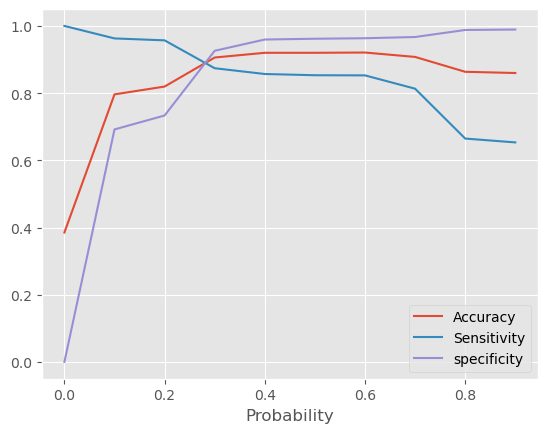

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','specificity'])
plt.show()

- From the curve above, 0.27 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.287761     3009          0    1    1    1    0    0    0   
1        0      0.328745     1012          0    1    1    1    1    0    0   
2        0      0.002104     9226          0    1    0    0    0    0    0   
3        1      0.738907     4750          1    1    1    1    1    1    1   
4        1      0.993984     7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                1  
1    0    0    0    0                1  
2    0    0    0    0                0  
3    1    1    0    0                1  
4    1    1    1    1                1

#### Step 19: Precision and recall tradeoff

In [89]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

Text(0.5, 1.0, 'Precision-Recall Trade Off')

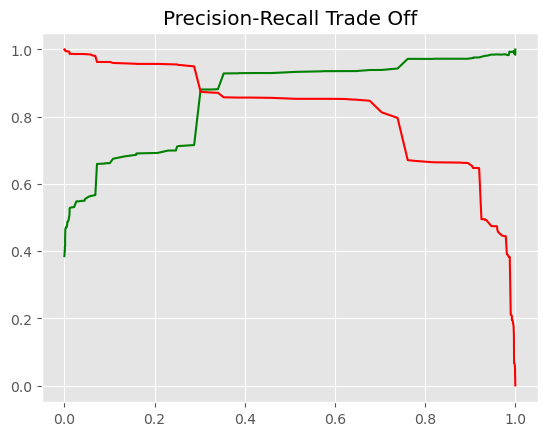

In [90]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision-Recall Trade Off")

#### Step 20: Making predictions on the test set

- In Senisitiy-Specificity-Accuracy curve 0.27 looks as the optimum cut-off point and in Precision recall curve 0.3 looks optimal
- We are taking 0,27 as optimal and cut off point and assigning Lead Score in Training Data

In [91]:
y_train_pred_final = y_train_pred_final.iloc[:,:3]
y_train_pred_final['Convert_Predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Convert  Convert_Prob  Pros_ID  Convert_Predicted  Lead_Score
0         0      0.287761     3009                  1          29
1         0      0.328745     1012                  1          33
2         0      0.002104     9226                  0           0
3         1      0.738907     4750                  1          74
4         1      0.993984     7987                  1          99
5         1      0.987730     1281                  1          99
6         0      0.287761     2880                  1          29
7         1      0.703522     4971                  1          70
8         1      0.919952     7536                  1          92
9         0      0.002104     1248                  0           0
10        0      0.287761     1429                  1          29
11        0      0.340520     2178                  1          34
12        0      0.001668     8554                  0           0
13        1      0.987730     5044                  1          99
14        1      0.999082     3475                  1         100
15        1      0.987730     7424                  1          99
16        0      0.000949      421                  0           0
17        0      0.287761     3591                  1          29
18        0      0.021596     6247                  0           2
19        0      0.011425     7843                  0           1

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Convert_Predicted )
print(confusion)

[[2982  923]
 [ 123 2323]]


In [93]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score:" , metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Convert_Predicted))
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Calculate the specificity
print("Specificity :",TN / float(TN+FP))
#Precision Score
print("Precision Score : ", precision_score(y_train_pred_final.Convert, y_train_pred_final.Convert_Predicted))
#Recall Score
print("Recall Score : ", recall_score(y_train_pred_final.Convert, y_train_pred_final.Convert_Predicted))

Accuracy Score: 0.8353015273185325
Sensitivity : 0.9497138184791496
Specificity : 0.7636363636363637
Precision Score :  0.7156500308071473
Recall Score :  0.9497138184791496


In [94]:
# Evaluating the predicted values on the test set

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns = ['Converting_Probability'])
y_test_df['Prospect_ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['Final_Predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

Converted  Prospect_ID  Converting_Probability  Final_Predicted  Lead_Score
0          0         3271                0.287761                1          29
1          1         1490                0.978958                1          98
2          0         7936                0.287761                1          29
3          1         4216                0.996295                1         100
4          0         3830                0.287761                1          29

In [95]:
# Evaluating Model Performance on Test data
confusion = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.Final_Predicted )
print(confusion)


[[1302  432]
 [  70  919]]


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score:" , metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Calculate the specificity
print("Specificity :",TN / float(TN+FP))
#Precision Score
print("Precision Score : ", precision_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))
#Recall Score
print("Recall Score : ", recall_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))

Accuracy Score: 0.8156445097319134
Sensitivity : 0.9292214357937311
Specificity : 0.7508650519031141
Precision Score :  0.6802368615840119
Recall Score :  0.9292214357937311


#### Step 21: Final Model

In [97]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    recall_sc = recall_score = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        print("Recall :", recall_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc,recall_sc

In [98]:
# Defining a function to create a model to return predicted values when training and test data and probability cut off is given

def build_model(X_train, y_train, X_test, y_test, cutoff = 0.5):
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("**************************Result of training data**************************")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("**************************Result of test data**************************")
    print(y_test_pred_final.head())
    
    print("**************************Model Evaluation Metrics**************************")
    confusion = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.Final_Predicted )
    print("Confusion Matrix :\n",confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Accuracy Score:" , metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))

    print("Sensitivity :",TP / float(TP+FN))

    print("Specificity :",TN / float(TN+FP))

    print("Precision Score : ", precision_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))

    print("Recall Score : ", recall_score(y_predicted_final.Converted, y_predicted_final.Final_Predicted))
     
    return y_test_pred_final

In [99]:
build_model(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

**************************Result of training data**************************
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.287761                  1          29
1         1012          0             0.328745                  1          33
2         9226          0             0.002104                  0           0
3         4750          1             0.738907                  1          74
4         7987          1             0.993984                  1          99
**************************Result of test data**************************
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.287761                  1          29
1         1490          1             0.978958                  1          98
2         7936          0             0.287761                  1          29
3         4216          1             0.996295                  1       

Prospect ID  Converted  Convert_Probability  Convert_predicted  \
0            3271          0             0.287761                  1   
1            1490          1             0.978958                  1   
2            7936          0             0.287761                  1   
3            4216          1             0.996295                  1   
4            3830          0             0.287761                  1   
...           ...        ...                  ...                ...   
2718          850          0             0.068654                  0   
2719         2879          0             0.001668                  0   
2720         6501          1             0.987730                  1   
2721         7155          0             0.068654                  0   
2722          376          0             0.068654                  0   

      Lead_Score  
0             29  
1             98  
2             29  
3            100  
4             29  
...          ...  
2718           7  
2719           0  
2720          99  
2721           7  
2722           7  

[2723 rows x 5 columns]

In [100]:
print("Features used in Final Model :", col)

print("**************************Feature Importance**************************")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
**************************Feature Importance**************************
const                                                  -1.345369
Do Not Email                                           -1.205859
Lead Source_Welingak Website                            4.141354
Last Activity_SMS Sent                                  1.946574
What is your current occupation_Working Professional    1.398274
Tags_Busy                                               3.610899
Tags_Closed by Horizzon    

### Conclusion :-

- The Logistic regression model predicts the probability of the target variable having certain value. The cut off value is used to obtain predicted value of target variable.
- Optimum cut off value is selected at 0.27 , any lead with probability greater than 0.27 can be considered as Hot Lead and any lead with less than 0.27 probability can be considered as a Cold Lead.
- Final model has 14 features (Do Not Email ,Lead Source_Welingak Website, Last Activity_SMS Sent , What is your current occupation_Working Professional ,Tags_Busy, Tags_Closed by Horizzon , Tags_Lost to EINS , Tags_Ringing , Tags_Will revert after reading the email , Tags_switched off , Lead Quality_Not Sure, Lead Quality_Worst   , Last Notable Activity_Modified  ,Last Notable Activity_Olark Chat Conversation)
- Top 3 Factors are 
    Tags_Lost to EINS (Coefficient Factor 9.555265)
    Tags_Closed by Horizzon (Coefficient Factor  8.640919
    Lead Source_Welingak Website  (Coefficient Factor 4.141354)
- The final model has Sensitivity of 0.929, this means the model is able to predict 92% customers out of all the converted customers correctly.
- The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.
- Also built a reusable function to which will help to create model and predict Lead Score as per different cut offs and sensitivity etc.
                             